### KMC

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer


In [3]:
data = load_breast_cancer(as_frame=True)


In [4]:
data


{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [5]:
data.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
data.feature_names.size


30

In [7]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [8]:
labels = data.target


In [9]:
# setting the features
data = data.data


In [10]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# converting back to dataframe
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [11]:
# mutating the data variable ***
data = scaled_data

In [12]:
from sklearn.metrics import silhouette_score

# Define a range of cluster numbers to try
cluster_range = range(2, 11)

# Initialize variables to store the results
best_score = -1
best_model = None
best_n_clusters = -1
best_init_method = None

# Iterate over the range of cluster numbers
for n_clusters in cluster_range:
    for init_method in ['k-means++', 'random']:
        # Instantiate the KMeans model
        # Set the desired number of clusters and initialization method
        kmeans = KMeans(n_clusters=n_clusters,
                        init=init_method, random_state=42)

        # Fit the model to the data
        kmeans.fit(data)

        # Calculate the silhouette score
        silhouette_avg = silhouette_score(data, kmeans.labels_)

        # Check if the current model has a higher silhouette score
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_model = kmeans
            best_n_clusters = n_clusters
            best_init_method = init_method

# Print the best number of clusters, initialization method, and the best model
print("Best number of clusters:", best_n_clusters)
print("Best initialization method:", best_init_method)
print("Best model:", best_model)


C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412:

Best number of clusters: 2
Best initialization method: k-means++
Best model: KMeans(n_clusters=2, random_state=42)


C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# more detailed analysis
# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=[
                          'Number of Clusters', 'k-means Silhouette Score', 'k-means++ Silhouette Score', 'Score Difference'])

# Iterate over the range of cluster numbers
for n_clusters in cluster_range:
    # Instantiate the k-means model with random initialization
    kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=42)
    kmeans.fit(data)
    kmeans_silhouette = silhouette_score(data, kmeans.labels_)

    # Instantiate the k-means++ model
    kmeans_pp = KMeans(n_clusters=n_clusters,
                       init='k-means++', random_state=42)
    kmeans_pp.fit(data)
    kmeans_pp_silhouette = silhouette_score(data, kmeans_pp.labels_)

    # Calculate the silhouette score difference
    score_diff = kmeans_pp_silhouette - kmeans_silhouette

    # Append the results to the DataFrame
    new_data = {'Number of Clusters': n_clusters,
            'k-means Silhouette Score': kmeans_silhouette,
            'k-means++ Silhouette Score': kmeans_pp_silhouette,
            'Score Difference': score_diff}
    new_row_df = pd.DataFrame([new_data], columns=results_df.columns)  # Create a DataFrame from the new data
    results_df = pd.concat([results_df, new_row_df], ignore_index=True)

# Display the results
print(results_df)


C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412:

  Number of Clusters  k-means Silhouette Score  k-means++ Silhouette Score  \
0                  2                  0.343382                    0.343382   
1                  3                  0.314384                    0.314384   
2                  4                  0.270971                    0.283305   
3                  5                  0.175649                    0.158210   
4                  6                  0.169557                    0.160367   
5                  7                  0.155978                    0.153186   
6                  8                  0.136637                    0.147195   
7                  9                  0.146680                    0.147040   
8                 10                  0.131422                    0.136656   

   Score Difference  
0          0.000000  
1          0.000000  
2          0.012335  
3         -0.017438  
4         -0.009190  
5         -0.002792  
6          0.010558  
7          0.000360  
8          0.005234  

C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
# this uses n_clusters=2, random_state=42 and init="k-means++"
# best silhoutte score is 1 and the worst is -1 (probably place for improvement here)
kmeans = best_model
print(kmeans)
print(f"The silhoutte score is: {np.round(silhouette_score(data,kmeans.labels_),3)}")

KMeans(n_clusters=2, random_state=42)
The silhoutte score is: 0.343


In [15]:
# accessing cluster labels
cluster_labels = kmeans.labels_


In [16]:
# Access the cluster centers
cluster_centers = kmeans.cluster_centers_


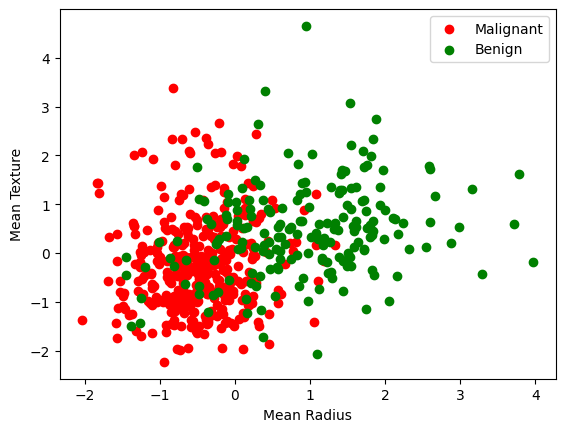

In [17]:
import matplotlib.pyplot as plt

# Create a scatter plot for malignant tumors
plt.scatter(data['mean radius'][cluster_labels == 0], data['mean texture']
            [cluster_labels == 0], c='red', label='Malignant')

# Create a scatter plot for benign tumors
plt.scatter(data['mean radius'][cluster_labels == 1],
            data['mean texture'][cluster_labels == 1], c='green', label='Benign')

# Set the axis labels
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [18]:
# interactive 3D plot
import plotly.graph_objects as go

# Select the three most influential features
x = data['mean radius']
y = data['mean texture']
z = data['mean perimeter']

# Create a trace for malignant tumors
trace_malignant = go.Scatter3d(
    x=x[cluster_labels == 0],
    y=y[cluster_labels == 0],
    z=z[cluster_labels == 0],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.8
    ),
    name='Malignant'
)

# Create a trace for benign tumors
trace_benign = go.Scatter3d(
    x=x[cluster_labels == 1],
    y=y[cluster_labels == 1],
    z=z[cluster_labels == 1],
    mode='markers',
    marker=dict(
        size=5,
        color='green',
        opacity=0.8
    ),
    name='Benign'
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis_title='Mean Radius',
        yaxis_title='Mean Texture',
        zaxis_title='Mean Perimeter'
    ),
    showlegend=True
)

# Create the figure
fig = go.Figure(data=[trace_malignant, trace_benign], layout=layout)

# Show the figure
fig.show(renderer="browser")

In [19]:
fig.write_html("plot.html")

### PCA and KMC

In [20]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


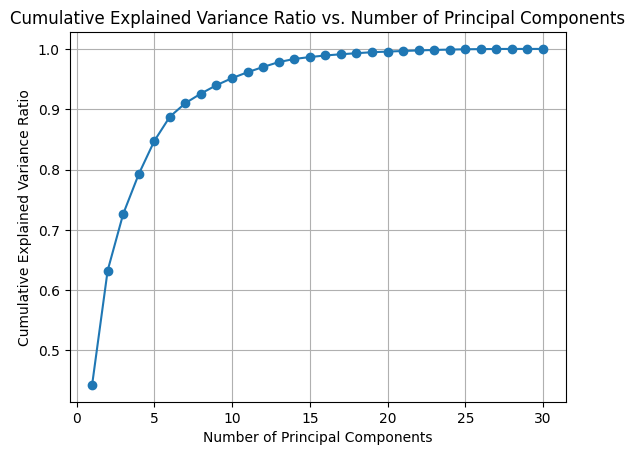

In [21]:
# obtaining the number of principal components needed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create the PCA object
pca = PCA()
pca.fit(data)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [22]:
# Choosing 10 components here
# Create the PCA object
pca = PCA(n_components=10) 

# Apply PCA to the data
pca_data = pca.fit_transform(data)

# Create a DataFrame for the PCA data
pc_columns = ['PC{}'.format(i+1) for i in range(pca_data.shape[1])]
pca_df = pd.DataFrame(data=pca_data, columns=pc_columns)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Display the PCA DataFrame
print(pca_df.head())

Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
        PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159369   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013359   
2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668165   
3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429914   
4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   

        PC8       PC9      PC10  
0 -0.398407 -0.157110 -0.877398  
1  0.240990 -0.711912  1.106990  
2  0.097374  0.024066  0.454266  
3  1.059567 -1.405446 -1.116993  
4  0.636375 -0.263807  0.377710  


In [31]:
# Instantiate the KMeans model
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(pca_df)

C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

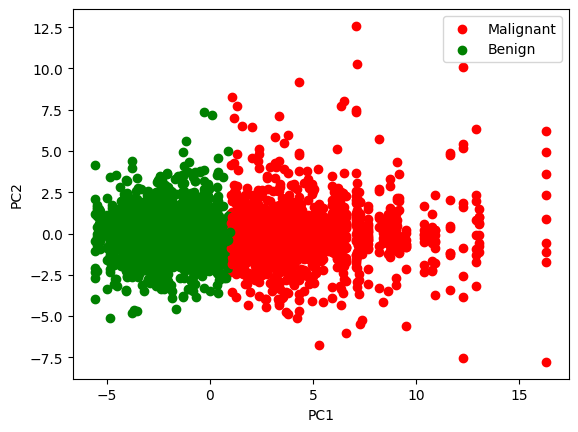

In [32]:
# Kmeans with PCA
# accessing cluster labels
cluster_labels = kmeans.labels_

# Access the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot for malignant tumors
plt.scatter(pca_df['PC1'][cluster_labels == 0], pca_df['PC2'][cluster_labels == 0], c='red', label='Malignant')

# Create a scatter plot for benign tumors
plt.scatter(pca_df['PC1'][cluster_labels == 1], pca_df['PC2'][cluster_labels == 1], c='green', label='Benign')

# Extend the scatter plot to include PC3 to PC10
for i in range(2, 10):
    plt.scatter(pca_df['PC1'][cluster_labels == 0], pca_df['PC{}'.format(i + 1)][cluster_labels == 0], c='red')
    plt.scatter(pca_df['PC1'][cluster_labels == 1], pca_df['PC{}'.format(i + 1)][cluster_labels == 1], c='green')

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [25]:
# Apply PCA to the data
pca = PCA(n_components=10)
pca_data = pca.fit_transform(data)

# Get the transformations of PC1 to PC10
pc_transformations = pca.components_[:10]

# Print the transformations
for i, pc_transform in enumerate(pc_transformations):
    print(f"Transformations of PC{i+1}: {pc_transform}\n")

Transformations of PC1: [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]

Transformations of PC2: [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]

Transformations of PC3: [-0.00853124  0.0645499  -0.00931422  0.02869953 -0.1042919  -0.07409157
  0.00273384 -0.02556354 -0.04023994 -0.02257409  0.26848139  0.37463367
  0.26664537  0.21600653  0.30883898  0.15477972  0.17646374  0.22465757
  0.28

In [26]:
# looking at the silhouette score
kmeans_pp = KMeans(n_clusters=2,
                       init='k-means++', random_state=42)
kmeans_pp.fit(pca_df)
kmeans_pp_silhouette = silhouette_score(pca_df, kmeans_pp.labels_)

C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [36]:
print(f"Silhoutte score together with PCA and KMeans++: {np.round(kmeans_pp_silhouette,2)}")

Silhoutte score together with PCA and KMeans++: 0.36


There is an improvement of 0.02 in the silhouette score.
This shows that using PCA together with KMeans++ results in a great improvement in the score